# **Mnist Digits Generator**

## Import Dependencies

In [1]:
import os
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Subset
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## Load Data and Preprocessing

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [4]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

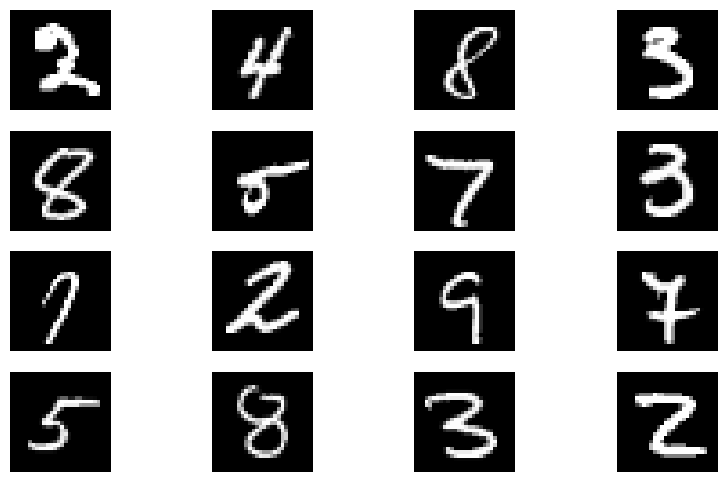

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10,  6))
axes = axes.ravel()

subset_data = next(iter(trainLoader))[0][:16]

for i, img in enumerate(subset_data):
    axes[i].imshow(img.permute(1, 2, 0), cmap="gray")
    axes[i].axis("off")

## Generator Architecture

In [6]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(input_dim, 256)
        self.fc_2 = nn.Linear(256, 512)
        self.fc_3 = nn.Linear(512, 1024)
        self.fc_4 = nn.Linear(1024, output_dim * output_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc_1(x), 0.2)
        x = F.leaky_relu(self.fc_2(x), 0.2)
        x = F.leaky_relu(self.fc_3(x), 0.2)
        
        return F.tanh(self.fc_4(x))

## Discriminator Architecture

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc_1 = nn.Linear(28*28, 1024)
        self.fc_2 = nn.Linear(1024, 512)
        self.fc_3 = nn.Linear(512, 256)
        self.fc_4 = nn.Linear(256, 1)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc_1(x), 0.2)
        x = F.leaky_relu(self.fc_2(x), 0.2)
        x = F.leaky_relu(self.fc_3(x), 0.2)
        
        return F.sigmoid(self.fc_4(x))

In [8]:
generator = Generator(100, 28)
discriminator = Discriminator()

generator.to(device)
discriminator.to(device)

loss_criterion = nn.BCELoss()

lr = 0.0002
beta_1 = 0.5
beta_2 = 0.999

gen_optimizer = torch.optim.Adam(generator.parameters(), lr=lr, betas=(beta_1, beta_2))
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(beta_1, beta_2))

In [9]:
num_epochs = 50
noise_dim = 100
batch_size = 64

fixed_noise = torch.randn(batch_size, noise_dim)

## Training

Epoch 1 - Time Taken: 118.73 seconds - Gen Loss: 2.3378 - Disc Loss: 0.7496
Epoch 2 - Time Taken: 127.40 seconds - Gen Loss: 2.9130 - Disc Loss: 0.5595
Epoch 3 - Time Taken: 130.97 seconds - Gen Loss: 2.8569 - Disc Loss: 0.4118
Epoch 4 - Time Taken: 130.94 seconds - Gen Loss: 2.4618 - Disc Loss: 0.5250
Epoch 5 - Time Taken: 130.54 seconds - Gen Loss: 2.1368 - Disc Loss: 0.6286
Epoch 6 - Time Taken: 129.39 seconds - Gen Loss: 2.0261 - Disc Loss: 0.6465
Epoch 7 - Time Taken: 130.98 seconds - Gen Loss: 1.8363 - Disc Loss: 0.7409
Epoch 8 - Time Taken: 128.03 seconds - Gen Loss: 1.7235 - Disc Loss: 0.7826
Epoch 9 - Time Taken: 128.55 seconds - Gen Loss: 1.6950 - Disc Loss: 0.7913
Epoch 10 - Time Taken: 129.91 seconds - Gen Loss: 1.6540 - Disc Loss: 0.8170


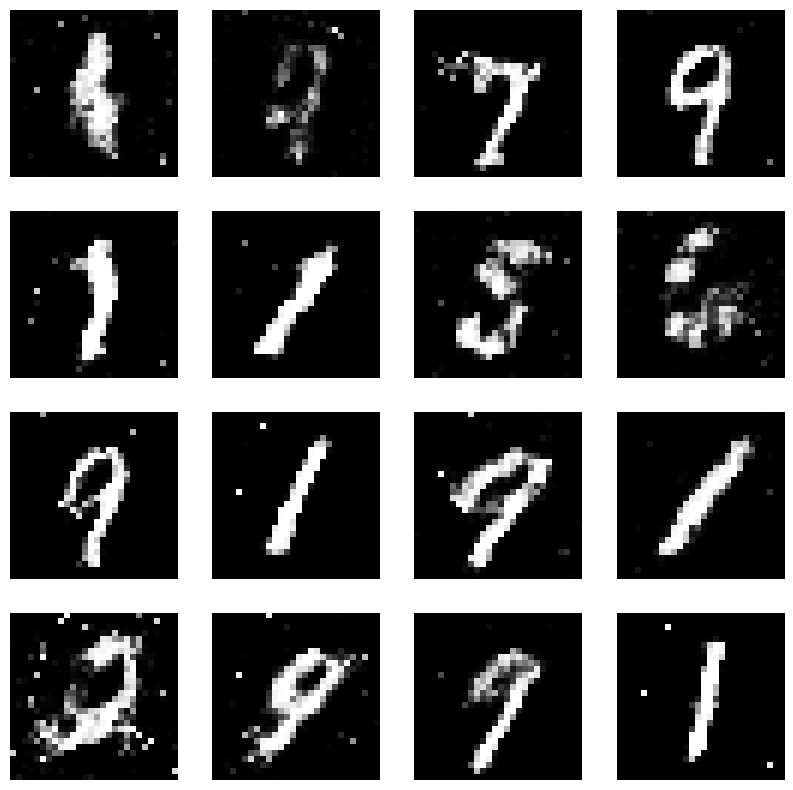

Epoch 11 - Time Taken: 129.85 seconds - Gen Loss: 1.6445 - Disc Loss: 0.8195
Epoch 12 - Time Taken: 129.32 seconds - Gen Loss: 1.6384 - Disc Loss: 0.8195
Epoch 13 - Time Taken: 1008.90 seconds - Gen Loss: 1.6221 - Disc Loss: 0.8369
Epoch 14 - Time Taken: 128.86 seconds - Gen Loss: 1.6265 - Disc Loss: 0.8337
Epoch 15 - Time Taken: 121.86 seconds - Gen Loss: 1.6119 - Disc Loss: 0.8374
Epoch 16 - Time Taken: 124.29 seconds - Gen Loss: 1.6168 - Disc Loss: 0.8313
Epoch 17 - Time Taken: 121.10 seconds - Gen Loss: 1.6127 - Disc Loss: 0.8337
Epoch 18 - Time Taken: 126.60 seconds - Gen Loss: 1.5895 - Disc Loss: 0.8367
Epoch 19 - Time Taken: 129.55 seconds - Gen Loss: 1.5761 - Disc Loss: 0.8382
Epoch 20 - Time Taken: 124.72 seconds - Gen Loss: 1.5645 - Disc Loss: 0.8516


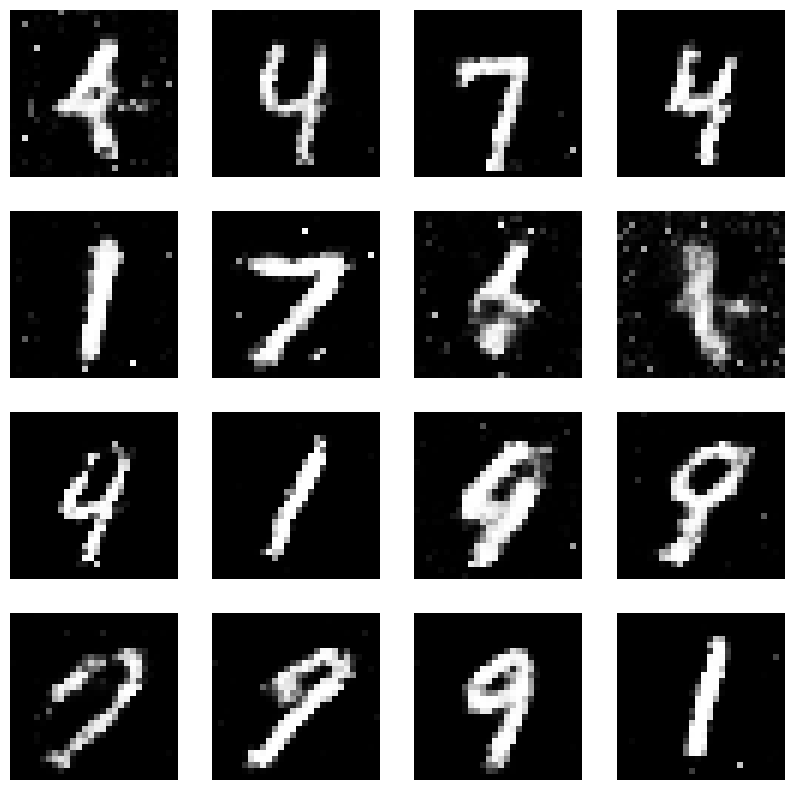

Epoch 21 - Time Taken: 124.33 seconds - Gen Loss: 1.5595 - Disc Loss: 0.8488
Epoch 22 - Time Taken: 128.42 seconds - Gen Loss: 1.5540 - Disc Loss: 0.8513
Epoch 23 - Time Taken: 127.52 seconds - Gen Loss: 1.5614 - Disc Loss: 0.8468
Epoch 24 - Time Taken: 126.52 seconds - Gen Loss: 1.5622 - Disc Loss: 0.8453
Epoch 25 - Time Taken: 125.04 seconds - Gen Loss: 1.5640 - Disc Loss: 0.8394
Epoch 26 - Time Taken: 124.61 seconds - Gen Loss: 1.5469 - Disc Loss: 0.8445
Epoch 27 - Time Taken: 123.35 seconds - Gen Loss: 1.5494 - Disc Loss: 0.8477
Epoch 28 - Time Taken: 125.52 seconds - Gen Loss: 1.5369 - Disc Loss: 0.8481
Epoch 29 - Time Taken: 125.60 seconds - Gen Loss: 1.5338 - Disc Loss: 0.8486
Epoch 30 - Time Taken: 124.69 seconds - Gen Loss: 1.5408 - Disc Loss: 0.8468


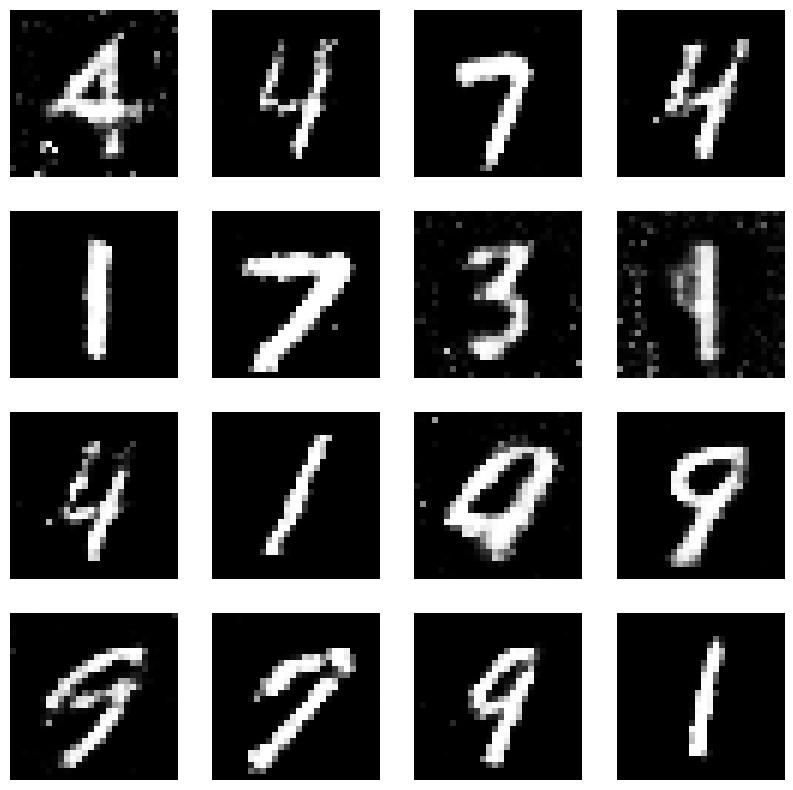

Epoch 31 - Time Taken: 119.55 seconds - Gen Loss: 1.5242 - Disc Loss: 0.8529
Epoch 32 - Time Taken: 103.26 seconds - Gen Loss: 1.5316 - Disc Loss: 0.8437
Epoch 33 - Time Taken: 50.36 seconds - Gen Loss: 1.5231 - Disc Loss: 0.8493
Epoch 34 - Time Taken: 51.14 seconds - Gen Loss: 1.5121 - Disc Loss: 0.8557
Epoch 35 - Time Taken: 51.55 seconds - Gen Loss: 1.5151 - Disc Loss: 0.8500
Epoch 36 - Time Taken: 52.00 seconds - Gen Loss: 1.5064 - Disc Loss: 0.8523
Epoch 37 - Time Taken: 52.24 seconds - Gen Loss: 1.5165 - Disc Loss: 0.8494
Epoch 38 - Time Taken: 52.99 seconds - Gen Loss: 1.5131 - Disc Loss: 0.8521
Epoch 39 - Time Taken: 52.84 seconds - Gen Loss: 1.5151 - Disc Loss: 0.8486
Epoch 40 - Time Taken: 51.27 seconds - Gen Loss: 1.5197 - Disc Loss: 0.8462


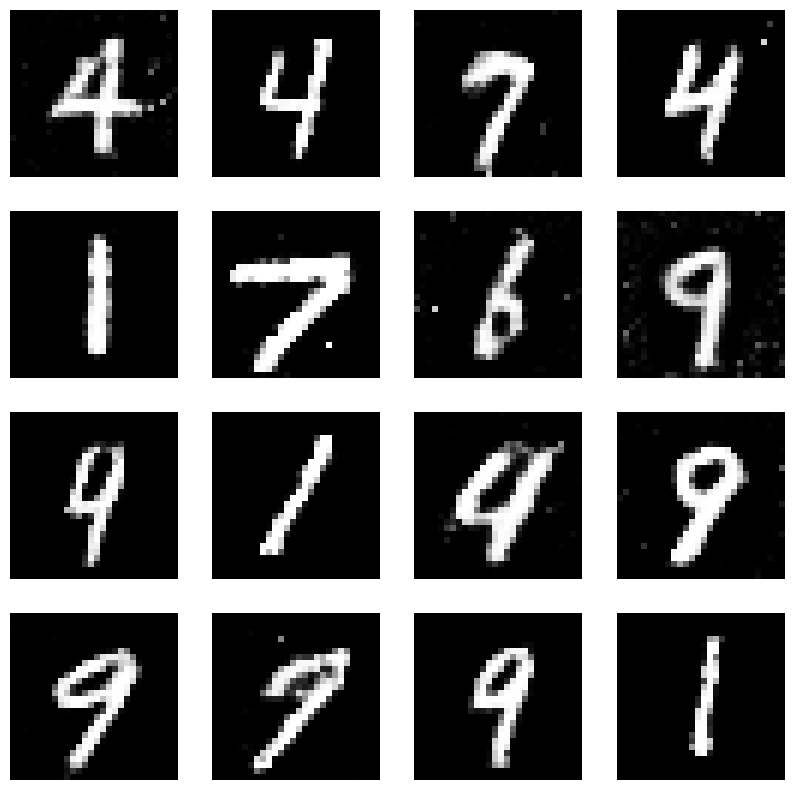

Epoch 41 - Time Taken: 53.52 seconds - Gen Loss: 1.5137 - Disc Loss: 0.8448
Epoch 42 - Time Taken: 50.64 seconds - Gen Loss: 1.5171 - Disc Loss: 0.8449
Epoch 43 - Time Taken: 50.80 seconds - Gen Loss: 1.5217 - Disc Loss: 0.8429
Epoch 44 - Time Taken: 53.91 seconds - Gen Loss: 1.5196 - Disc Loss: 0.8414
Epoch 45 - Time Taken: 55.43 seconds - Gen Loss: 1.5313 - Disc Loss: 0.8367
Epoch 46 - Time Taken: 52.59 seconds - Gen Loss: 1.5361 - Disc Loss: 0.8315
Epoch 47 - Time Taken: 52.56 seconds - Gen Loss: 1.5444 - Disc Loss: 0.8258
Epoch 48 - Time Taken: 52.38 seconds - Gen Loss: 1.5467 - Disc Loss: 0.8223
Epoch 49 - Time Taken: 53.00 seconds - Gen Loss: 1.5479 - Disc Loss: 0.8220
Epoch 50 - Time Taken: 52.74 seconds - Gen Loss: 1.5578 - Disc Loss: 0.8199


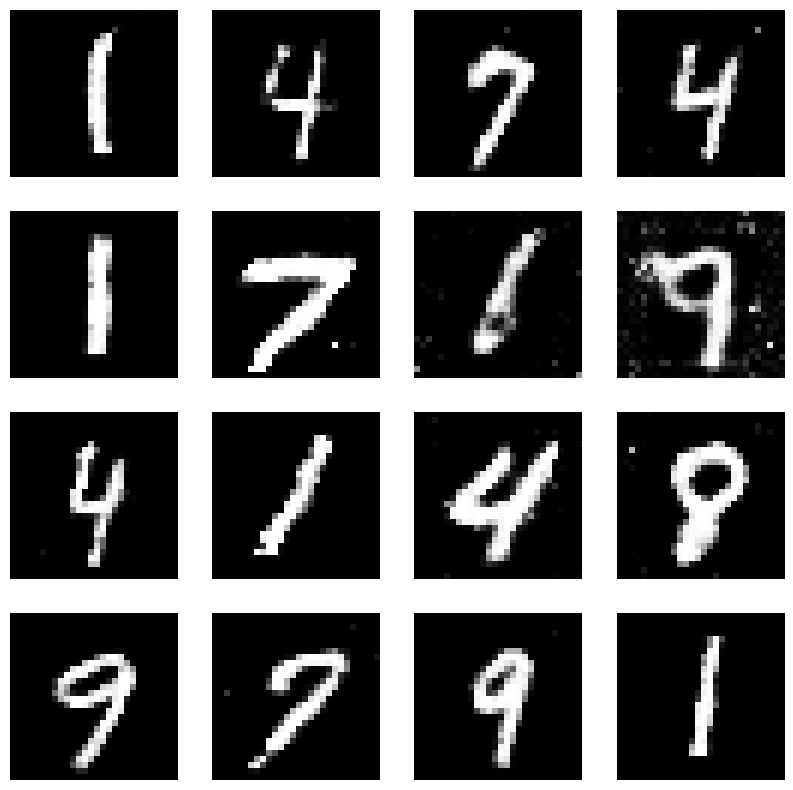

In [10]:
for epoch in range(num_epochs):
    epoch_gen_loss = []
    epoch_disc_loss = []
    start_time = time.time()
    
    for i, data in enumerate(trainLoader, 0):
        
        real_data = data[0].view(-1, 28*28).to(device)
        batch_size = real_data.size(0)
        
        labels_ones = torch.ones(batch_size, 1, device=device)
        labels_zeros = torch.zeros(batch_size, 1, device=device)
        
        # Train Discriminator
        discriminator.zero_grad()
        
        real_output = discriminator(real_data)
        
        noise = torch.randn(batch_size, noise_dim, device=device)
        
        gen_output = generator(noise)
        fake_output = discriminator(gen_output)
        
        real_loss = loss_criterion(real_output, labels_ones)
        fake_loss = loss_criterion(fake_output, labels_zeros)
        disc_loss = real_loss + fake_loss
        
        disc_loss.backward()
        disc_optimizer.step()
        
        # Train Generator
        
        generator.zero_grad()
        
        noise = torch.randn(batch_size, noise_dim, device=device)
        gen_output = generator(noise)
        disc_output = discriminator(gen_output)
        
        gen_loss = loss_criterion(disc_output, labels_ones)
        gen_loss.backward()
        gen_optimizer.step()
        
        epoch_gen_loss.append(gen_loss.item())
        epoch_disc_loss.append(disc_loss.item())
        
    print(f"Epoch {epoch + 1} - Time Taken: {time.time() - start_time:.2f} seconds - Gen Loss: {sum(epoch_gen_loss) / len(epoch_gen_loss):.4f} - Disc Loss: {sum(epoch_disc_loss) / len(epoch_disc_loss):.4f}")        
        
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_images = generator(fixed_noise).view(-1, 1, 28, 28)
            generated_images = (generated_images + 1) / 2.0

            fig, axes = plt.subplots(4, 4, figsize=(10, 10))
            axes = axes.ravel()

            for i in range(16):
                axes[i].imshow(generated_images[i].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap="gray")
                axes[i].axis('off')
            
            plt.subplots_adjust(hspace=0.2, wspace=0.2)
            plt.show()

        

## Save Models

In [14]:
def save_model(model, optimizer, epoch, path):
    state = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }
    torch.save(state, path)
    
os.makedirs("models", exist_ok=True)
save_model(generator, gen_optimizer, num_epochs, 'models/mnist_generator.pth')

In [15]:
save_model(generator, disc_optimizer, num_epochs, 'models/mnist_discriminator.pth')